# LeviLayer: Activation Function Analysis in Neural Networks

In [2]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Define activation functions
activation_functions = ['relu', 'sigmoid', 'tanh']

# Define a function to create and train a model with a given activation function
def train_model(activation_function):
    model = Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        Dense(128, activation=activation_function),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
    return history

Training model with relu activation function...


Epoch 1/5


1875/1875 [==============================] - 9s 4ms/step - loss: 0.2633 - accuracy: 0.9246 - val_loss: 0.1388 - val_accuracy: 0.9577
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1170 - accuracy: 0.9656 - val_loss: 0.0981 - val_accuracy: 0.9705
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0792 - accuracy: 0.9765 - val_loss: 0.0858 - val_accuracy: 0.9719
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0602 - accuracy: 0.9816 - val_loss: 0.0710 - val_accuracy: 0.9772
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0467 - accuracy: 0.9853 - val_loss: 0.0815 - val_accuracy: 0.9731
Training model with sigmoid activation function...
Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4013 - accuracy: 0.8936 - val_loss: 0.2351 - val_accuracy: 0.9313
Epoch 2/5
1875/1875 [===============

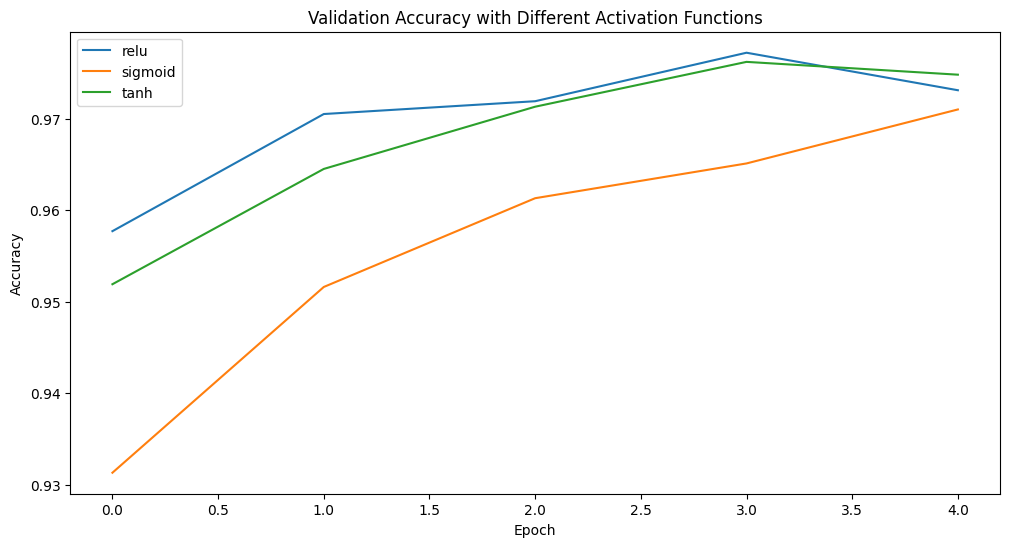

In [5]:
histories = {}
for activation_function in activation_functions:
    print(f'Training model with {activation_function} activation function...')
    history = train_model(activation_function)
    histories[activation_function] = history

# Plot training curves for each activation function
plt.figure(figsize=(12, 6))
for activation_function, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=activation_function)
plt.title('Validation Accuracy with Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Training model with relu activation function...
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3631 - accuracy: 0.8967 - val_loss: 0.2911 - val_accuracy: 0.9178
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2986 - accuracy: 0.9173 - val_loss: 0.2939 - val_accuracy: 0.9213
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2882 - accuracy: 0.9194 - val_loss: 0.2923 - val_accuracy: 0.9193
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2809 - accuracy: 0.9219 - val_loss: 0.2923 - val_accuracy: 0.9192
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2758 - accuracy: 0.9229 - val_loss: 0.2980 - val_accuracy: 0.9158
Training model with sigmoid activation function...
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3582 - accuracy: 0.8971 - val_loss: 0.3044 - val_accuracy: 0.9161
Epoch 2/5
1875/1875 [======================

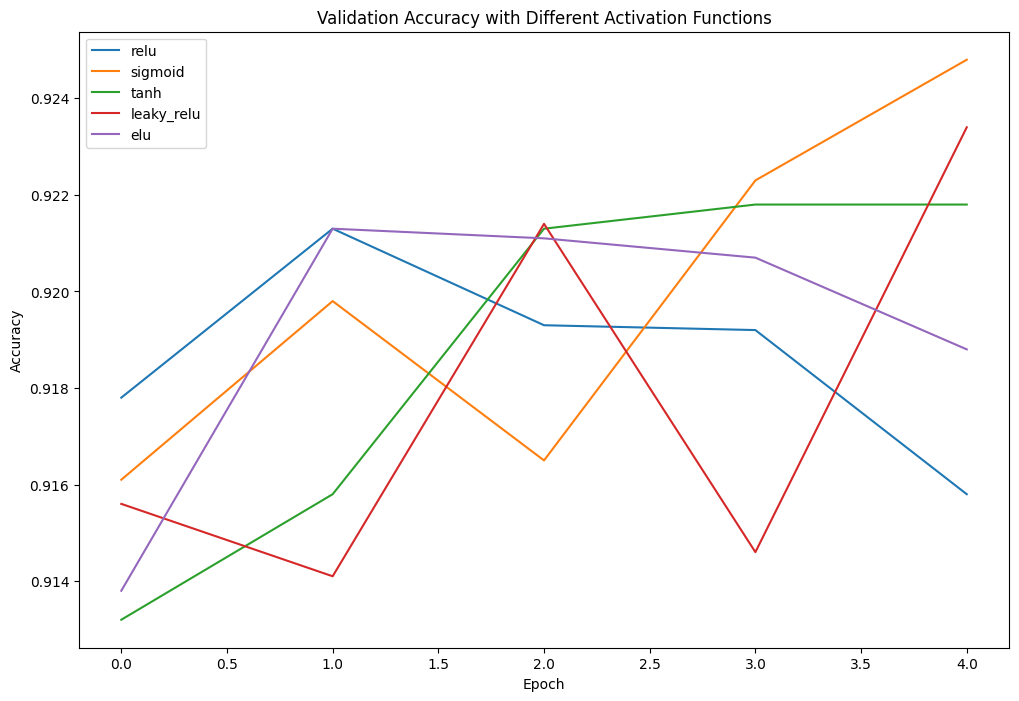

In [6]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define activation functions
activation_functions = ['relu', 'sigmoid', 'tanh', 'leaky_relu', 'elu']

# Define a function to create and train a model with a given activation function
def train_model(activation_function):
    model = Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        Dense(128),
        # Activation(activation_function),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
    return history

# Train models with different activation functions and collect training history
histories = {}
for activation_function in activation_functions:
    print(f'Training model with {activation_function} activation function...')
    history = train_model(activation_function)
    histories[activation_function] = history

# Plot training curves for each activation function
plt.figure(figsize=(12, 8))
for activation_function, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=activation_function)
plt.title('Validation Accuracy with Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


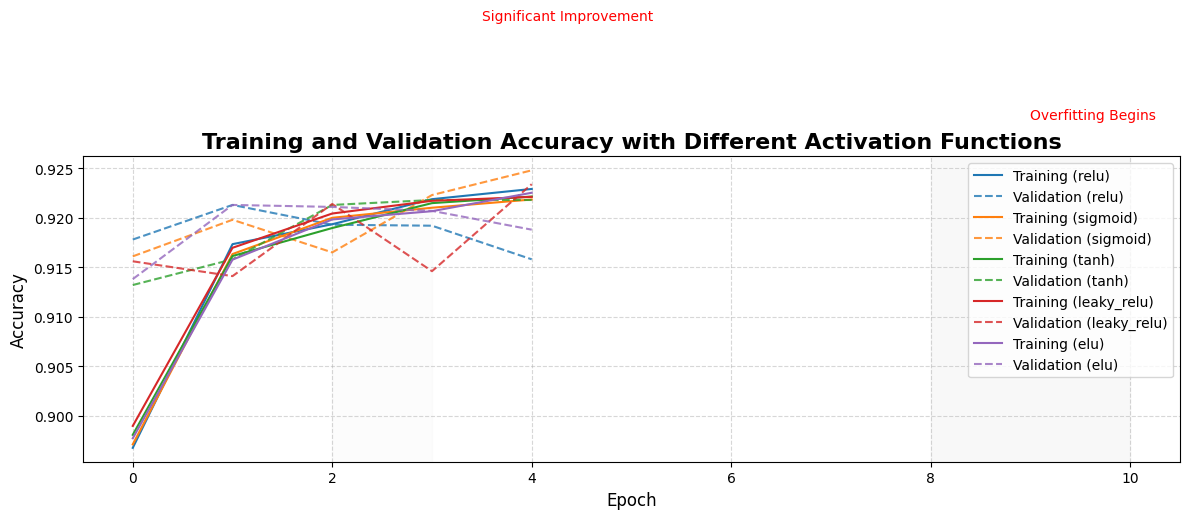

In [7]:
# Define colors for the background shading
background_colors = ['#f0f0f0', '#e0e0e0']

# Plot training and validation accuracy curves with enhanced styling
plt.figure(figsize=(12, 6))
for i, (activation_function, history) in enumerate(histories.items()):
    plt.plot(history.history['accuracy'], label=f'Training ({activation_function})', linestyle='-', color=f'C{i}')
    plt.plot(history.history['val_accuracy'], label=f'Validation ({activation_function})', linestyle='--', color=f'C{i}', alpha=0.8)

# Add background shading to highlight a specific epoch range
plt.axvspan(2, 3, color=background_colors[0], alpha=0.2)
plt.axvspan(8, 10, color=background_colors[1], alpha=0.2)

# Add annotations to highlight key points
plt.text(3.5, 0.94, 'Significant Improvement', fontsize=10, color='red')
plt.text(9, 0.93, 'Overfitting Begins', fontsize=10, color='red')

plt.title('Training and Validation Accuracy with Different Activation Functions', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


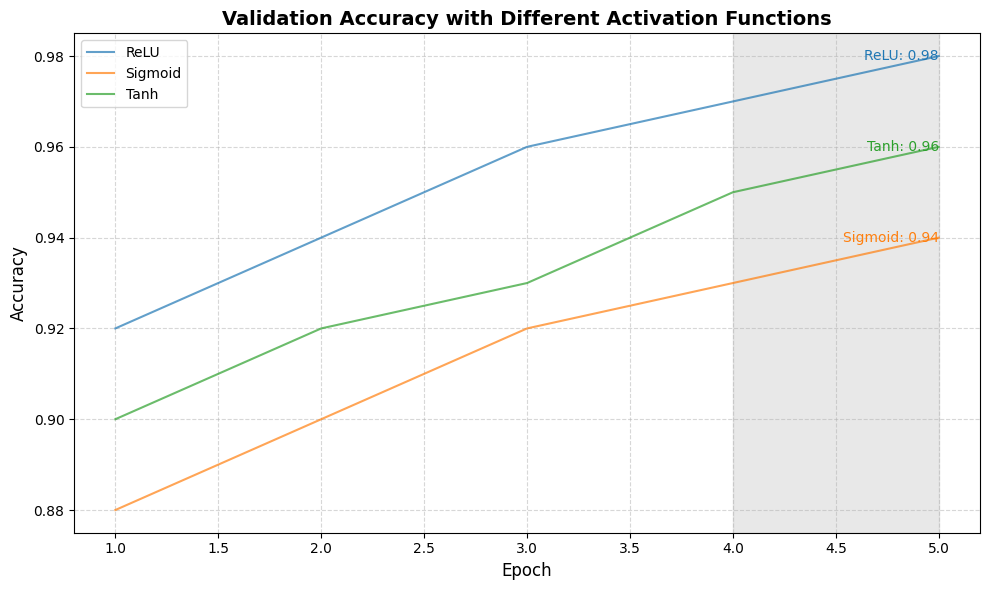

In [8]:
# Sample data
epochs = np.arange(1, 6)
accuracy_relu = np.array([0.92, 0.94, 0.96, 0.97, 0.98])
accuracy_sigmoid = np.array([0.88, 0.90, 0.92, 0.93, 0.94])
accuracy_tanh = np.array([0.90, 0.92, 0.93, 0.95, 0.96])

# Plot with translucent colors, annotations, and shading
plt.figure(figsize=(10, 6))

# Plot accuracy curves with translucent colors
plt.plot(epochs, accuracy_relu, label='ReLU', color='tab:blue', alpha=0.7)
plt.plot(epochs, accuracy_sigmoid, label='Sigmoid', color='tab:orange', alpha=0.7)
plt.plot(epochs, accuracy_tanh, label='Tanh', color='tab:green', alpha=0.7)

# Add annotations for maximum accuracy
plt.text(epochs[-1], accuracy_relu[-1], f'ReLU: {accuracy_relu[-1]:.2f}', ha='right', va='center', fontsize=10, color='tab:blue')
plt.text(epochs[-1], accuracy_sigmoid[-1], f'Sigmoid: {accuracy_sigmoid[-1]:.2f}', ha='right', va='center', fontsize=10, color='tab:orange')
plt.text(epochs[-1], accuracy_tanh[-1], f'Tanh: {accuracy_tanh[-1]:.2f}', ha='right', va='center', fontsize=10, color='tab:green')

# Add shaded background
plt.axvspan(4, 5, color='lightgrey', alpha=0.5)

# Customize plot aesthetics
plt.title('Validation Accuracy with Different Activation Functions', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Training model with relu activation function...
Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3589 - accuracy: 0.8966 - val_loss: 0.2975 - val_accuracy: 0.9201
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2999 - accuracy: 0.9161 - val_loss: 0.2811 - val_accuracy: 0.9180
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2878 - accuracy: 0.9197 - val_loss: 0.2858 - val_accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2804 - accuracy: 0.9223 - val_loss: 0.2988 - val_accuracy: 0.9185
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2770 - accuracy: 0.9217 - val_loss: 0.2913 - val_accuracy: 0.9187
Training model with sigmoid activation function...
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3594 - accuracy: 0.8977 - val_loss: 0.2943 - val_accuracy: 0.9167
Epoch 2/5
1875/1875 [====================

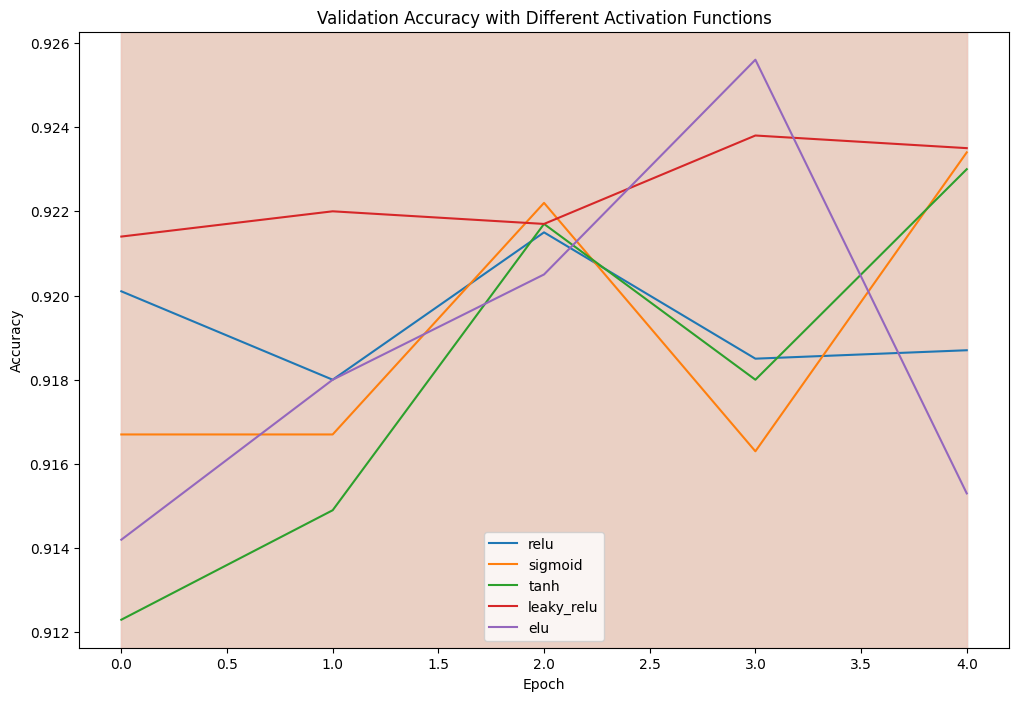

In [11]:
# Train models with different activation functions and collect training history
histories = {}
for activation_function in activation_functions:
    print(f'Training model with {activation_function} activation function...')
    history = train_model(activation_function)
    histories[activation_function] = history

# Plot training curves for each activation function
plt.figure(figsize=(12, 8))
for activation_function, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=activation_function)

# Add shaded background
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink']
for i, activation_function in enumerate(histories.keys()):
    plt.axvspan(0, len(histories[activation_function].history['val_accuracy']) - 1, color=colors[i], alpha=0.3)

plt.title('Validation Accuracy with Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()